In [95]:
#import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
plt.style.use('default')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# CCAI-312 Project 

# Raghad Bahashwan 2006661
# Wesal Alkhateeb      2006661
# Rahaf Alhadhrami   2005943

# 1. Data Understanding

In [96]:
# loading file 
df = pd.read_csv('../input/motorcycle-dataset/BIKE DETAILS.csv')
# reading the dataset
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [97]:
# size of rows and columns
df.shape

(1061, 7)

In [98]:
# describe the basics statistics of the data
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [99]:
# get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [100]:
# checking the distribution of categorical data
print(df.seller_type.value_counts())
print(df.owner.value_counts())

Individual    1055
Dealer           6
Name: seller_type, dtype: int64
1st owner    924
2nd owner    123
3rd owner     11
4th owner      3
Name: owner, dtype: int64


In [101]:
# checking for null values 
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

# 2. Data Preproccecing

In [102]:
# drop the null values
df.dropna(inplace=True)
# checking again for null values
df.isnull().sum()

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

In [103]:
#df.dropna(inplace=True)
# reset lại index của Dataframe 
#df.reset_index(drop=True, inplace=True)
#from sklearn.impute import SimpleImputer
#imp = SimpleImputer(missing_values=np.nan, strategy='mean')
#df['ex_showroom_price']=imp.fit_transform(df['ex_showroom_price'].values.reshape(-1,1))

In [104]:
#df['ex_showroom_price'].fillna(np.round(df['ex_showroom_price'].median(),2),inplace=True)
#df['ex_showroom_price']
#np.round(df['ex_showroom_price'],2)

In [105]:
# checking again for null values
df.isnull().sum()

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

In [106]:
# encoding "Seller_Type" Column
df.replace({'seller_type':{'Individual':0,'Dealer':1}},inplace=True)
# encoding "owner" Column
df.replace({'owner':{'1st owner':0,'2nd owner':1,'3rd owner':2,'4th owner':3}},inplace=True)

In [107]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
2,Royal Enfield Classic Gunmetal Grey,150000,2018,0,0,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,0,0,23000,89643.0
5,Honda CB Twister,18000,2010,0,0,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,0,0,17000,87719.0
9,Bajaj Discover 125,50000,2016,0,0,42000,60122.0
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,0,0,500000,52000.0
1057,Honda CB twister,16000,2012,0,0,33000,51000.0
1058,Bajaj Discover 125,15000,2013,0,1,35000,57000.0
1059,Honda CB Shine,12000,2009,0,0,53000,58000.0


In [108]:
df.describe()

,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
count,626.000000,626.000000,626.000000,626.000000,626.000000,6.260000e+02
mean,59445.164537,2014.800319,0.004792,0.119808,32671.576677,8.795871e+04
std,59904.350888,3.018885,0.069116,0.353303,45479.661039,7.749659e+04
min,6000.000000,2001.000000,0.000000,0.000000,380.000000,3.049000e+04
25%,30000.000000,2013.000000,0.000000,0.000000,13031.250000,5.485200e+04
50%,45000.000000,2015.000000,0.000000,0.000000,25000.000000,7.275250e+04
75%,65000.000000,2017.000000,0.000000,0.000000,40000.000000,8.703150e+04
max,760000.000000,2020.000000,1.000000,3.000000,585659.000000,1.278000e+06


# 3. Correlation

<AxesSubplot:>

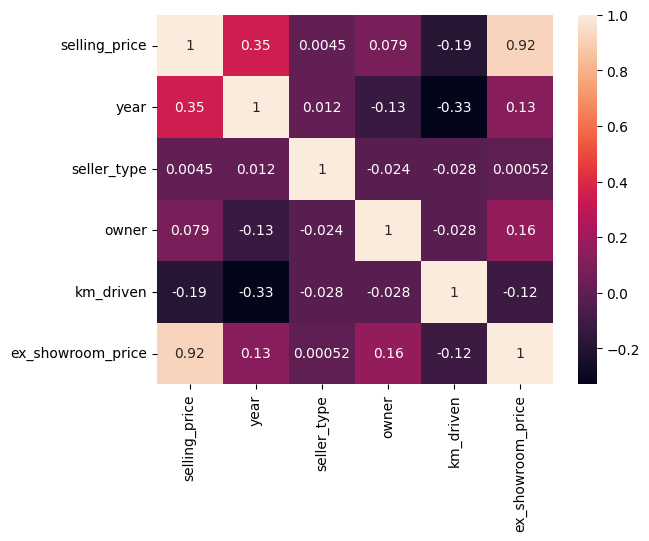

In [109]:
"""
    (ex_showroom_price ,year) has better corelation with selling_price
"""
sns.heatmap(df.corr(),annot=True)

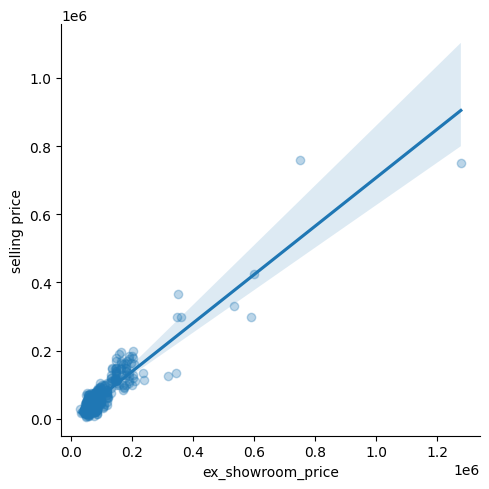

In [110]:
# relationship between ex_showroom_price and selling price
ax = sns.lmplot(data=df, x='ex_showroom_price', y='selling_price', scatter_kws={'alpha':0.3})
ax.set(xlabel='ex_showroom_price', ylabel='selling price')


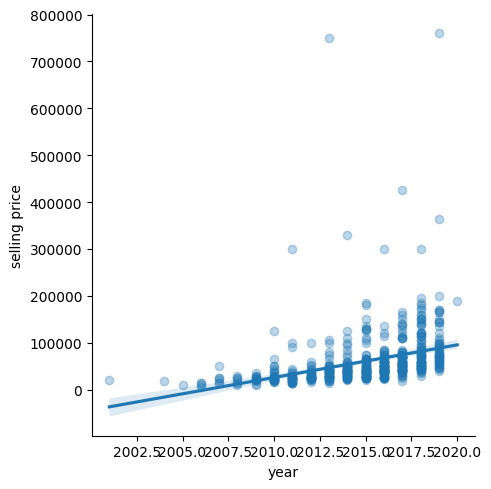

In [111]:
"""
    "ex_showroom_price" has higher corelation with selling_price than "year"
"""
# relationship between year and selling price
ax = sns.lmplot(data=df, x='year', y='selling_price', scatter_kws={'alpha':0.3})
ax.set(xlabel='year', ylabel='selling price')

# 4. Choosing Feature and label

In [112]:
# drop all the other columns except ex_showroom_price
x=df.drop(['name','selling_price','year','seller_type','owner','km_driven'],axis=1)
y= df['selling_price']


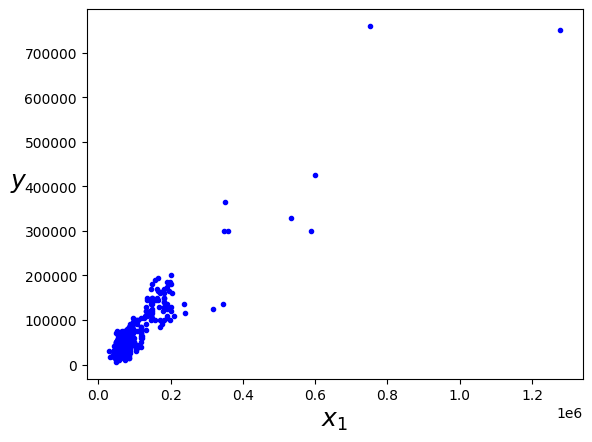

In [113]:
"""
    The outer points are outliers in the diagram givem below.
"""

feature = ['ex_showroom_price']
x=df[feature]
label=['selling_price']
y=df[label]
plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

In [114]:
#feature
print(x)

      ex_showroom_price
2              148114.0
3               89643.0
5               53857.0
6               87719.0
9               60122.0
...                 ...
1056            52000.0
1057            51000.0
1058            57000.0
1059            58000.0
1060            75000.0

[626 rows x 1 columns]


In [115]:
#label
print(y)

      selling_price
2            150000
3             65000
5             18000
6             78500
9             50000
...             ...
1056          17000
1057          16000
1058          15000
1059          12000
1060          10000

[626 rows x 1 columns]


# 5. Splitting Training and Test data

In [116]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Performing standard scaling of datasets
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.fit_transform(y_test)

In [117]:
print(X_train.shape)
print(y_train.shape)
np.array(X_train)
np.array(y_train)
print(X_test.shape)
print(y_test.shape)
print(y.shape)
print(x.shape)

(500, 1)
(500, 1)
(126, 1)
(126, 1)
(626, 1)
(626, 1)


# 6. Model Training

# linear Regression

In [118]:
# loading the linear regression model
lin_reg = LinearRegression()
# train the model
lin_reg.fit(X_train,y_train)

LinearRegression()

In [119]:
#predict the selling_price by usibg all the value present in X_train
# prediction on Training data
train_prediction = lin_reg.predict(X_train)

In [120]:
# compare the value predectied by our model with the other values in y_train by using RSE

print("training error")
print("MAE: %.2f" % mean_absolute_error(y_train, train_prediction))
print("RMSE: %.2f" % math.sqrt(mean_squared_error(y_train, train_prediction)))
print("MSE: %.2f" % mean_squared_error(y_train, train_prediction))
error_train= y_train - train_prediction

training error
MAE: 0.25
RMSE: 0.38
MSE: 0.15


In [121]:
# train_prediction
#X_train

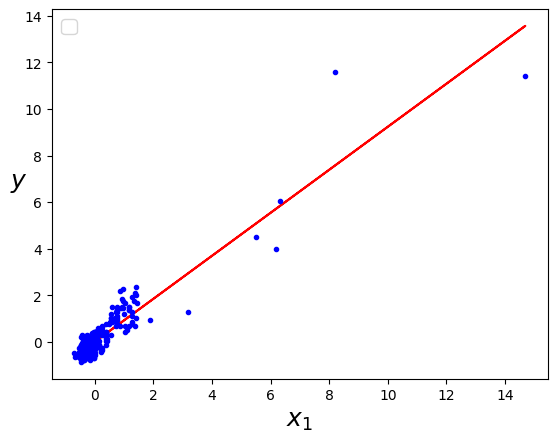

In [122]:
plt.plot(X_train,train_prediction,"r-")
plt.plot(X_train,y_train,"b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

In [123]:
#X_train

In [124]:
# prediction on testing data
test_prediction = lin_reg.predict(X_test)

In [125]:
# compare the value predectied by our model with the other values by using RSE

print("testing error")
print("MAE: %.2f" % mean_absolute_error(y_test, test_prediction))
print("RMSE: %.2f" % math.sqrt(mean_squared_error(y_test, test_prediction)))
print("MSE: %.2f" % mean_squared_error(y_test, test_prediction))


testing error
MAE: 0.27
RMSE: 0.41
MSE: 0.17


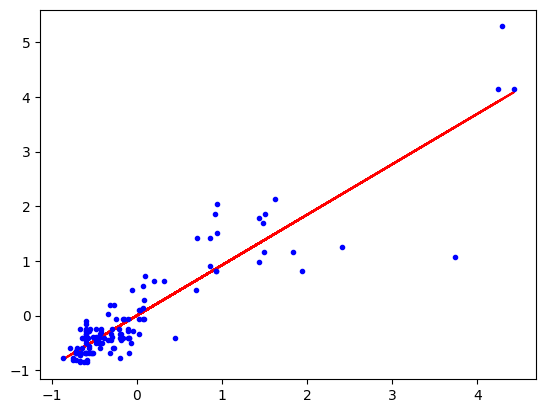

In [126]:
plt.plot(X_test,test_prediction,"r-")
plt.plot(X_test,y_test,"b.")
plt.show()

# Polynomial Features

In [127]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train,y_train)
#predict on train data using the model
y_pred_train = LR.predict(X_train)
#calculate Error for train8
error_train= y_train - y_pred_train

# Polynomial Features

In [143]:
# first degree 

x_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y)


poly_features=PolynomialFeatures(degree=1,include_bias=False)
X_poly= poly_features.fit_transform(x_scaled)
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y_scaled)
lin_reg.intercept_,lin_reg.coef_



(array([-2.989302e-17]), array([[0.91858331]]))

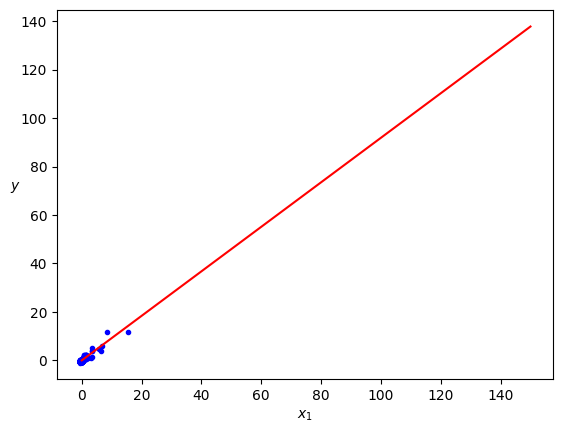

In [129]:

X_new=np.linspace(0, 150, 120).reshape (120,1)
X_new_poly = poly_features.transform(X_new)
y_train_poly = lin_reg.predict(X_poly)
y_new = lin_reg.predict (X_new_poly)
plt. plot(x_scaled, y_scaled,"b.")
plt.plot(X_new, y_new, "r-", label="Predictions")
plt.xlabel("$x_1$", fontsize=10)
plt.ylabel("$y$", rotation=0, fontsize=10)
plt.show()

In [130]:
# second degree 

poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly= poly_features.fit_transform(x_scaled)
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y_scaled)
lin_reg.intercept_,lin_reg.coef_



(array([0.01889433]), array([[ 1.07764816, -0.01889433]]))

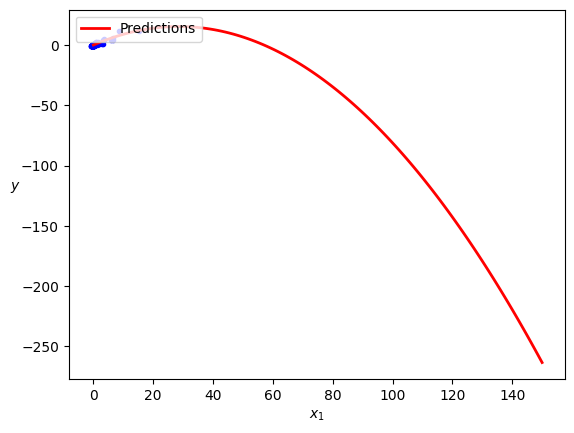

In [131]:
X_new_poly = poly_features.transform(X_new)
y_train_poly = lin_reg.predict(X_poly)
y_new = lin_reg.predict (X_new_poly)
plt. plot(x_scaled, y_scaled,"b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=10)
plt.ylabel("$y$", rotation=0, fontsize=10)
plt.legend (loc="upper left", fontsize=10)
plt.show()

In [132]:
#tenth degree
poly_features=PolynomialFeatures(degree=10,include_bias=False)
X_poly= poly_features.fit_transform(x_scaled)
lin_reg=LinearRegression()
lin_reg.fit(X_poly , y_scaled)
lin_reg.intercept_,lin_reg.coef_

(array([-0.06409076]),
 array([[ 1.05141077e+00,  8.44453486e-01,  2.64682388e-01,
         -9.72706691e-01,  7.03804868e-02,  2.43304440e-01,
         -9.75515778e-02,  1.53738890e-02, -1.08546302e-03,
          2.80413781e-05]]))

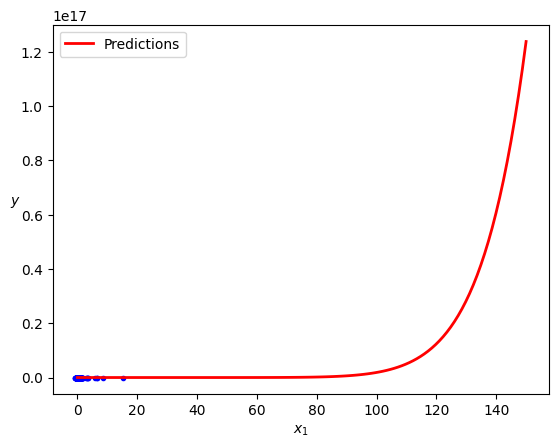

In [133]:
X_new=np.linspace(0, 150, 120).reshape (120,1)
X_new_poly = poly_features.transform(X_new)
y_train_poly = lin_reg.predict(X_poly)
y_new = lin_reg.predict (X_new_poly)
plt. plot(x_scaled, y_scaled,"b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=10)
plt.ylabel("$y$", rotation=0, fontsize=10)
plt.legend (loc="upper left", fontsize=10)
plt.show()

# lasso regression

In [134]:
# loading the linear regression model
lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)

Lasso()

In [135]:
len(X_train)

500

In [136]:
# prediction on Training data
train_prediction = lasso_reg.predict(X_train)

In [137]:
# compare the value predectied by our model with the other values by using RSE
from sklearn.metrics import mean_squared_error
print("training error")
print("MAE: %.2f" % mean_absolute_error(y_train, train_prediction))
print("RMSE: %.2f" % math.sqrt(mean_squared_error(y_train, train_prediction)))
print("MSE: %.2f" % mean_squared_error(y_train, train_prediction))

training error
MAE: 0.51
RMSE: 1.00
MSE: 1.00


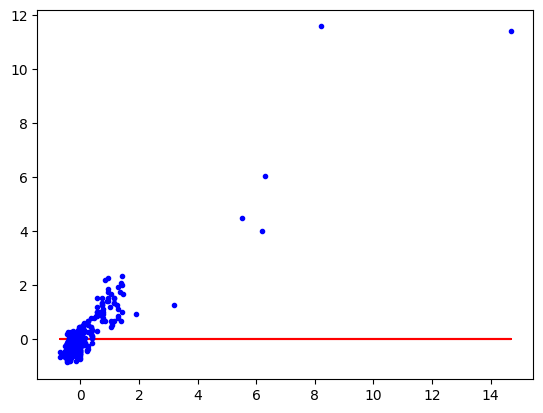

In [138]:
plt.plot(X_train,train_prediction,"r-")
plt.plot(X_train,y_train,"b.")
plt.show()

In [139]:
# prediction on testing data
test_prediction = lasso_reg.predict(X_test)

In [140]:
# compare the value predectied by our model with the other values by using RSE

print("testing error")
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, test_prediction))
print("root mean square error %.2f" % math.sqrt(mean_squared_error(y_test, test_prediction)))
print("MSE: %.2f" % mean_squared_error(y_test, test_prediction))

testing error
Mean absolute error: 0.68
root mean square error 1.00
MSE: 1.00


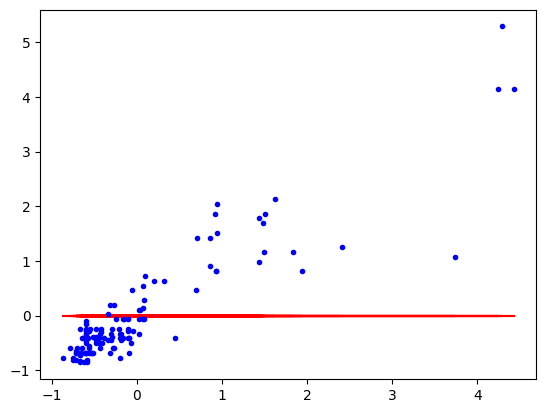

In [141]:
plt.plot(X_test,test_prediction,"r-")
plt.plot(X_test,y_test,"b.")
plt.show()